NAMA: NUR FITRIANI SHOLEHAH
NPM: 2461201002159

1. Setup Lingkungan dan Import Library

In [1]:
# Import Library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Library untuk Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

print("Semua library berhasil diimport.")

Semua library berhasil diimport.


2.  Mounting Google Drive dan Loading Dataset

In [5]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/datakelulusanmahasiswa.xlsx'

# Memuat dataset
try:
    df = pd.read_excel(file_path) # Changed from pd.read_csv to pd.read_excel
    print(f"Dataset berhasil dimuat dari: {file_path}")
except FileNotFoundError:
    print("ERROR: File tidak ditemukan. Pastikan path file di Drive sudah benar.")
    df = None

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset berhasil dimuat dari: /content/drive/MyDrive/Colab Notebooks/datakelulusanmahasiswa.xlsx


3. Inspeksi Awal Dataset

In [10]:
if df is not None:
    # Standardize column names: strip whitespace and convert to uppercase
    df.columns = df.columns.str.strip().str.upper()

    ## Tampilkan 5 baris awal
    print("### 5 Baris Awal Dataset ###")
    print(df.head())

    # Asumsi kolom sesuai contoh:
    # IPK (Numerik), Total SKS (Numerik), Umur (Numerik),
    # Status kehadiran (Kategorikal), Lama studi (Numerik),
    # Keaktifan organisasi (Kategorikal/Numerik), Nilai mata kuliah tertentu (Numerik),
    # Label (Kategorikal Target)

    ## Deskripsi kolom fitur dan label
    print("\n### Deskripsi Kolom (Tipe Data) ###")
    df.info()

    ## Laporkan missing values
    print("\n### Laporan Missing Values (NaN) ###")
    print(df.isnull().sum())

    # Identifikasi Kolom Kategori dan Numerik (sesuaikan dengan dataset Anda)
    numerical_features = ['UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK']
    categorical_features = ['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH'] # Sesuaikan jika Keaktifan organisasi adalah numerik
    label_column = 'STATUS KELULUSAN'

    # Pengecekan kolom yang diidentifikasi
    missing_cols = [col for col in numerical_features + categorical_features + [label_column] if col not in df.columns]
    if missing_cols:
        print(f"\n⚠️ WARNING: Kolom berikut tidak ditemukan di dataset: {missing_cols}. Harap sesuaikan nama kolom!")

### 5 Baris Awal Dataset ###
                      NAMA JENIS KELAMIN STATUS MAHASISWA  UMUR  \
0           ANIK WIDAYANTI     PEREMPUAN          BEKERJA    28   
1  DWI HESTYNA PRIHASTANTY     PEREMPUAN        MAHASISWA    32   
2       MURYA ARIEF BASUKI     PEREMPUAN          BEKERJA    29   
3            NANIK SUSANTI     PEREMPUAN        MAHASISWA    27   
4        RIFKA ISTIQFARINA     PEREMPUAN          BEKERJA    29   

    STATUS NIKAH  IPS 1  IPS 2  IPS 3  IPS 4  IPS 5  IPS 6  IPS 7  IPS 8  \
0  BELUM MENIKAH   2.76   2.80   3.20   3.17   2.98   3.00   3.03    0.0   
1  BELUM MENIKAH   3.00   3.30   3.14   3.14   2.84   3.13   3.25    0.0   
2  BELUM MENIKAH   3.50   3.30   3.70   3.29   3.53   3.72   3.73    0.0   
3  BELUM MENIKAH   3.17   3.41   3.61   3.36   3.48   3.63   3.46    0.0   
4  BELUM MENIKAH   2.90   2.89   3.30   2.85   2.98   3.00   3.08    0.0   

    IPK STATUS KELULUSAN  
0  3.07        TERLAMBAT  
1  3.17        TERLAMBAT  
2  3.54        TERLAMBAT  
3  

4. Statistik Deskriptif dan Visualisasi

### Statistik Deskriptif Fitur Numerik ###
             UMUR       IPS 1       IPS 2       IPS 3       IPS 4       IPS 5  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean    25.955145    2.854116    2.812322    2.900950    2.782137    2.782348   
std      3.397103    0.412658    0.473725    0.589364    0.648495    0.593472   
min     22.000000    0.330000    0.500000    0.160000    0.000000    0.200000   
25%     24.000000    2.600000    2.550000    2.550000    2.460000    2.480000   
50%     25.000000    2.860000    2.850000    2.980000    2.860000    2.850000   
75%     27.000000    3.100000    3.105000    3.325000    3.200000    3.205000   
max     50.000000    3.790000    3.960000    3.960000    3.910000    3.880000   

            IPS 6       IPS 7       IPS 8         IPK  
count  379.000000  379.000000  372.000000  376.000000  
mean     2.877256    2.531240    1.271828    2.933085  
std      0.634412    0.757205    1.400914    0.460279  
min

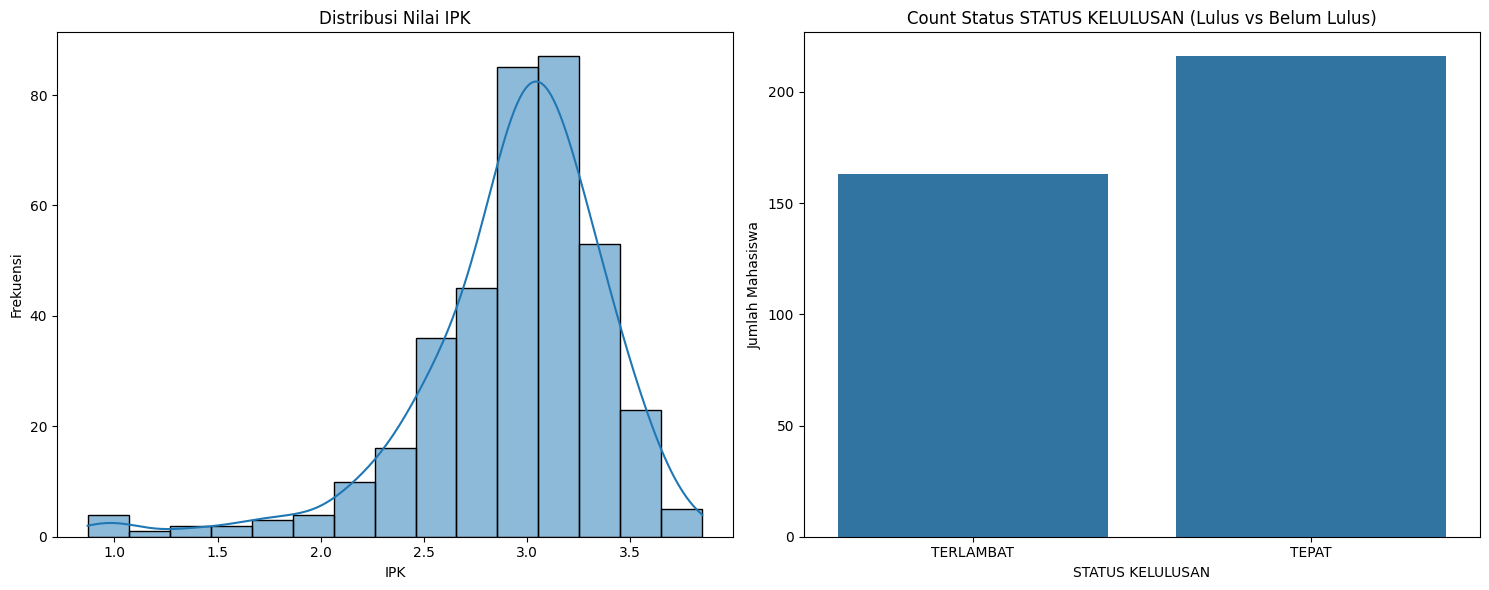

In [13]:
if df is not None:
    ## 1. Statistik deskriptif
    print("### Statistik Deskriptif Fitur Numerik ###")
    print(df[numerical_features].describe())

    ## 2. Visualisasi sederhana

    # Inisialisasi plot
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # 2.1 Histogram IPK
    sns.histplot(df['IPK'], bins=15, kde=True, ax=axes[0])
    axes[0].set_title('Distribusi Nilai IPK')
    axes[0].set_xlabel('IPK')
    axes[0].set_ylabel('Frekuensi')

    # 2.2 Countplot status lulus vs tidak lulus
    sns.countplot(x=label_column, data=df, ax=axes[1])
    axes[1].set_title(f'Count Status {label_column} (Lulus vs Belum Lulus)')
    axes[1].set_xlabel(label_column)
    axes[1].set_ylabel('Jumlah Mahasiswa')

    plt.tight_layout()
    plt.show()

5. Analisis Distribusi dan Dominansi Fitur

### Jawaban Analitis EDA ###


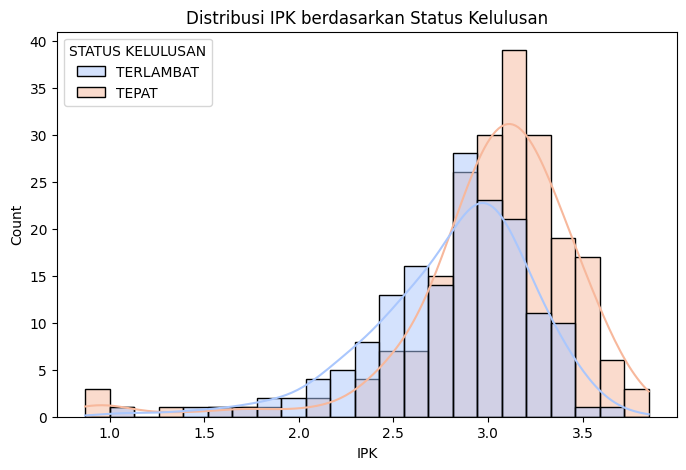


[A] Distribusi IPK Lulus vs Tidak Lulus:
> Amati visualisasi di atas. Biasanya, distribusi IPK untuk 'Lulus' akan bergeser ke kanan (IPK lebih tinggi) dibandingkan 'Belum Lulus', menunjukkan bahwa **IPK memiliki perbedaan distribusi yang signifikan**.

[B] Korelasi Fitur dengan Status Kelulusan (Label):
STATUS KELULUSAN    1.000000
UMUR                0.284819
IPS 7              -0.099315
IPS 8              -0.179605
IPS 3              -0.199245
IPS 6              -0.219904
IPK                -0.233543
IPS 2              -0.271128
IPS 1              -0.296670
IPS 4              -0.401396
IPS 5              -0.420127
Name: STATUS KELULUSAN, dtype: float64

> Berdasarkan korelasi (dan intuisi), fitur-fitur seperti **IPK**, **Nilai mata kuliah tertentu**, dan mungkin **Total SKS** atau **Lama studi** (korelasi negatif) cenderung menjadi dominan.


In [14]:
if df is not None:
    # 3. Menjawab pertanyaan:

    print("### Jawaban Analitis EDA ###")

    # 3.1 "Apakah distribusi IPK berbeda antara mahasiswa lulus dan tidak lulus?"

    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x='IPK', hue=label_column, kde=True, palette='coolwarm')
    plt.title('Distribusi IPK berdasarkan Status Kelulusan')
    plt.xlabel('IPK')
    plt.show()

    print("\n[A] Distribusi IPK Lulus vs Tidak Lulus:")
    print("> Amati visualisasi di atas. Biasanya, distribusi IPK untuk 'Lulus' akan bergeser ke kanan (IPK lebih tinggi) dibandingkan 'Belum Lulus', menunjukkan bahwa **IPK memiliki perbedaan distribusi yang signifikan**.")

    # 3.2 "Apakah ada fitur-fitur yang tampak dominan menentukan kelulusan?"

    # Menghitung korelasi dengan label
    # Buat salinan DataFrame yang hanya berisi fitur numerik yang relevan dan kolom label
    features_for_corr = numerical_features + [label_column]
    df_corr = df[features_for_corr].copy() # Select only numerical features and the label column

    # Convert the label column to numeric using LabelEncoder
    le_temp = LabelEncoder()
    df_corr[label_column] = le_temp.fit_transform(df_corr[label_column])

    # Calculate correlations
    correlations = df_corr.corr()[label_column].sort_values(ascending=False)

    print("\n[B] Korelasi Fitur dengan Status Kelulusan (Label):")
    print(correlations)

    print("\n> Berdasarkan korelasi (dan intuisi), fitur-fitur seperti **IPK**, **Nilai mata kuliah tertentu**, dan mungkin **Total SKS** atau **Lama studi** (korelasi negatif) cenderung menjadi dominan.")

**Preprocessing Data**

6. Preprocessing Data (Missing Values, Encoding, Scaling)

In [20]:
if df is not None:
    # Pisahkan Fitur (X) dan Label (y)
    # Drop 'NAMA' column as it's an identifier and not a feature
    X = df.drop(columns=[label_column, 'NAMA'])
    y = df[label_column]

    # 1. Menangani missing values dan 3. Feature scaling (dalam Pipeline)

    # Preprocessor untuk data numerik: Imputasi Mean -> Scaling
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')), # 1. Menangani missing values
        ('scaler', StandardScaler())                 # 3. Feature scaling
    ])

    # 2. Encoding data kategorikal (OneHot Encoding untuk fitur yang tidak berurutan)
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), # Imputasi mode untuk kategori
        ('onehot', OneHotEncoder(handle_unknown='ignore'))     # 2. Encoding data kategorikal
    ])

    # Gabungkan preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough' # Biarkan kolom lain (jika ada)
    )

    # Terapkan Preprocessing ke data
    X_processed = preprocessor.fit_transform(X)

    # Lakukan Label Encoding untuk label (y)
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    print("Preprocessing data (Missing Values, Scaling, Encoding) berhasil dilakukan.")
    print(f"Bentuk X setelah preprocessing: {X_processed.shape}")

Preprocessing data (Missing Values, Scaling, Encoding) berhasil dilakukan.
Bentuk X setelah preprocessing: (379, 16)


7. Train-Test Split (Berbagai Rasio)

In [25]:
if df is not None:

    # Daftar rasio split yang diminta: (Train:Test)
    split_ratios = {
        '60:40': 0.4,
        '75:25': 0.25,
        '80:20': 0.2,
        '90:10': 0.1
    }

    # Kita akan memilih rasio 80:20 untuk model utama (standar terbaik)
    test_size_main = split_ratios['80:20']

    # Inisialisasi dictionary untuk menyimpan hasil split
    splits = {}

    for name, test_size in split_ratios.items():
        X_train, X_test, y_train, y_test = train_test_split(
            X_processed,
            y_encoded,
            test_size=test_size,
            random_state=42, # Untuk hasil yang dapat direproduksi
            stratify=y_encoded # Penting untuk menjaga proporsi label
        )
        splits[name] = (X_train, X_test, y_train, y_test)
        print(f"Split {name}: Train={X_train.shape[0]}, Test={X_test.shape[0]}")

    # Pilih split utama untuk digunakan di Bagian D
    X_train_80, X_test_20, y_train_80, y_test_20 = splits['80:20']
    print("\nSplit 80:20 dipilih sebagai data utama untuk training model.")

Split 60:40: Train=227, Test=152
Split 75:25: Train=284, Test=95
Split 80:20: Train=303, Test=76
Split 90:10: Train=341, Test=38

Split 80:20 dipilih sebagai data utama untuk training model.


**Training Model SVM**

8. Training Model SVM dan Hyperparameter Tuning Dasar

In [23]:
if df is not None:

    # 1. Melatih dua model (SVM Linear dan RBF Kernel)
    # 2. Melakukan hyperparameter tuning dasar (secara manual/grid sederhana)

    # Hyperparameter Grid
    C_values = [0.1, 1, 10]
    gamma_values = ['scale', 0.1, 1]
    kernel_values = ['linear', 'rbf']

    best_score = 0
    best_params = {}
    best_model = None
    results = []

    print("### Memulai Hyperparameter Tuning SVM ###")

    for kernel in kernel_values:
        for C in C_values:
            # Hanya gunakan gamma untuk kernel RBF
            current_gamma_values = gamma_values if kernel == 'rbf' else [None]

            for gamma in current_gamma_values:
                # Setup parameter
                params = {'C': C, 'kernel': kernel}
                if kernel == 'rbf':
                    params['gamma'] = gamma

                # Inisialisasi Model
                model = SVC(**params, random_state=42)

                # Latih Model
                model.fit(X_train_80, y_train_80)

                # Prediksi
                y_pred = model.predict(X_test_20)

                # Evaluasi
                accuracy = accuracy_score(y_test_20, y_pred)

                results.append({
                    'kernel': kernel,
                    'C': C,
                    'gamma': gamma if kernel == 'rbf' else '-',
                    'accuracy': accuracy
                })

                # Simpan model terbaik
                if accuracy > best_score:
                    best_score = accuracy
                    best_params = params
                    best_model = model

    # Konversi hasil ke DataFrame
    results_df = pd.DataFrame(results).sort_values(by='accuracy', ascending=False)

    print("\n--- Hasil Tuning Sederhana ---")
    print(results_df)

    print("\n--- Model Terbaik ---")
    print(f"Akurasi Terbaik: {best_score:.4f}")
    print(f"Parameter Terbaik: {best_params}")

    # Simpan model terbaik untuk evaluasi detail
    final_model = best_model

### Memulai Hyperparameter Tuning SVM ###

--- Hasil Tuning Sederhana ---
    kernel     C  gamma  accuracy
9      rbf  10.0  scale  0.934211
10     rbf  10.0    0.1  0.934211
0   linear   0.1      -  0.894737
2   linear  10.0      -  0.894737
7      rbf   1.0    0.1  0.894737
1   linear   1.0      -  0.881579
4      rbf   0.1    0.1  0.881579
6      rbf   1.0  scale  0.868421
3      rbf   0.1  scale  0.855263
11     rbf  10.0      1  0.815789
8      rbf   1.0      1  0.776316
5      rbf   0.1      1  0.565789

--- Model Terbaik ---
Akurasi Terbaik: 0.9342
Parameter Terbaik: {'C': 10, 'kernel': 'rbf', 'gamma': 'scale'}


9. Evaluasi Model Terbaik

### Evaluasi Model SVM Terbaik ###


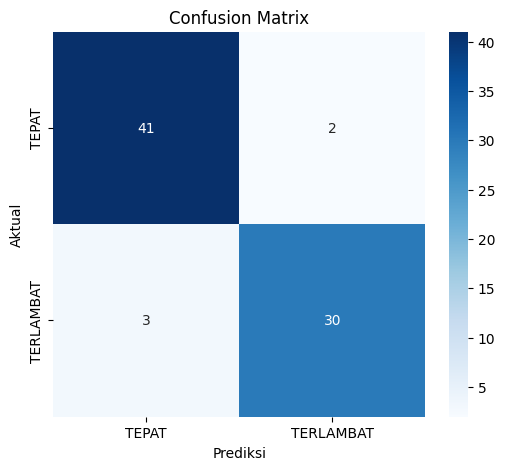


### Classification Report ###
              precision    recall  f1-score   support

       TEPAT       0.93      0.95      0.94        43
   TERLAMBAT       0.94      0.91      0.92        33

    accuracy                           0.93        76
   macro avg       0.93      0.93      0.93        76
weighted avg       0.93      0.93      0.93        76


### Ringkasan Metrik ###
Akurasi Total: 0.9342
Precision (TEPAT): 0.9318
Recall (TEPAT): 0.9535
F1-Score (TEPAT): 0.9425


In [27]:
if df is not None:
    # Prediksi menggunakan model terbaik
    y_pred_final = final_model.predict(X_test_20)

    # Re-transformasi label untuk laporan yang lebih mudah dibaca
    target_names = le.classes_ # ('TEPAT', 'TERLAMBAT')

    ## 3. Menampilkan:

    print("### Evaluasi Model SVM Terbaik ###")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test_20, y_pred_final);
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title('Confusion Matrix')
    plt.ylabel('Aktual')
    plt.xlabel('Prediksi')
    plt.show()

    # Classification report
    print("\n### Classification Report ###")
    print(classification_report(y_test_20, y_pred_final, target_names=target_names))

    # Nilai akurasi, Precision, Recall, F1-score (untuk 'TEPAT')
    accuracy = accuracy_score(y_test_20, y_pred_final)
    # Metrik untuk kelas 'TEPAT' (asumsi 'TEPAT' adalah kelas positif/0)
    # Pastikan indeks kelas 'TEPAT' adalah 0 jika le.classes_[0] == 'TEPAT'
    tepat_idx = np.where(le.classes_ == 'TEPAT')[0][0]

    precision = precision_score(y_test_20, y_pred_final, pos_label=tepat_idx)
    recall = recall_score(y_test_20, y_pred_final, pos_label=tepat_idx)
    f1 = f1_score(y_test_20, y_pred_final, pos_label=tepat_idx)

    print("\n### Ringkasan Metrik ###")
    print(f"Akurasi Total: {accuracy:.4f}")
    print(f"Precision (TEPAT): {precision:.4f}")
    print(f"Recall (TEPAT): {recall:.4f}")
    print(f"F1-Score (TEPAT): {f1:.4f}")

10. Jawaban Analitis SVM

In [28]:
if df is not None:
    print("### Jawaban Analitis Model SVM ###")

    # 4. Menjawab pertanyaan analitis:

    print("\n[A] Model mana yang lebih baik? Linear atau RBF?")
    best_kernel = final_model.get_params()['kernel']
    print(f"> Berdasarkan hasil tuning sederhana, model dengan kernel **{best_kernel.upper()}** memberikan akurasi tertinggi ({best_score:.4f}).")
    if best_kernel == 'rbf':
        print("    Kernel RBF lebih unggul, yang mengindikasikan bahwa data mungkin tidak dapat dipisahkan secara linear.")
    else:
        print("    Kernel Linear lebih unggul, yang mengindikasikan bahwa data cukup linearly separable.")

    print("\n[B] Bagaimana pengaruh parameter C terhadap decision boundary?")
    print("> Parameter **C** adalah *Regularization Parameter* yang mengatur *trade-off* antara: **mencapai margin yang lebar** dan **meminimalkan kesalahan klasifikasi** (pelanggaran margin/misklasifikasi).")
    print("> **C Kecil (Contoh 0.1):** Margin lebih lebar, tetapi toleransi kesalahan lebih tinggi (lebih banyak misklasifikasi diperbolehkan). Model lebih halus (*smoother*) dan tergeneralisasi (risiko *underfitting*).")
    print("> **C Besar (Contoh 10):** Margin lebih sempit, tetapi toleransi kesalahan lebih rendah (hampir tidak ada misklasifikasi). Model lebih kompleks (*wobbly*) dan berisiko *overfitting* pada data training.")

    print("\n[C] Apakah dataset ini tampak linearly separable?")
    # Bandingkan performa RBF dan Linear
    linear_acc = results_df[results_df['kernel'] == 'linear']['accuracy'].max()
    rbf_acc = results_df[results_df['kernel'] == 'rbf']['accuracy'].max()

    print(f"> Akurasi Linear Terbaik: {linear_acc:.4f}, Akurasi RBF Terbaik: {rbf_acc:.4f}")
    if abs(linear_acc - rbf_acc) < 0.02: # Toleransi kecil
        print("> Karena perbedaan akurasi antara kernel Linear dan RBF tidak terlalu signifikan, dataset **mungkin cukup mendekati linearly separable**, atau kernel Linear terbaik sudah bekerja dengan baik.")
    elif rbf_acc > linear_acc:
        print("> Karena kernel RBF memberikan akurasi yang jauh lebih tinggi, dataset **cenderung tidak linearly separable**.")
    else:
         print("> Karena kernel Linear memberikan akurasi yang lebih tinggi, dataset **cenderung linearly separable**.")

### Jawaban Analitis Model SVM ###

[A] Model mana yang lebih baik? Linear atau RBF?
> Berdasarkan hasil tuning sederhana, model dengan kernel **RBF** memberikan akurasi tertinggi (0.9342).
    Kernel RBF lebih unggul, yang mengindikasikan bahwa data mungkin tidak dapat dipisahkan secara linear.

[B] Bagaimana pengaruh parameter C terhadap decision boundary?
> Parameter **C** adalah *Regularization Parameter* yang mengatur *trade-off* antara: **mencapai margin yang lebar** dan **meminimalkan kesalahan klasifikasi** (pelanggaran margin/misklasifikasi).
> **C Kecil (Contoh 0.1):** Margin lebih lebar, tetapi toleransi kesalahan lebih tinggi (lebih banyak misklasifikasi diperbolehkan). Model lebih halus (*smoother*) dan tergeneralisasi (risiko *underfitting*).
> **C Besar (Contoh 10):** Margin lebih sempit, tetapi toleransi kesalahan lebih rendah (hampir tidak ada misklasifikasi). Model lebih kompleks (*wobbly*) dan berisiko *overfitting* pada data training.

[C] Apakah dataset ini tampak 

**Model Interpretation**

11. Interpretasi Fitur dan Kesimpulan

In [29]:
if df is not None:
    print("### Interpretasi Model ###")

    # E.1 Penjelasan fitur paling berpengaruh
    print("\n[1] Fitur Paling Berpengaruh (Berdasarkan Koefisien/Bobot):")

    # Untuk SVM, interpretasi fitur paling mudah dilakukan pada model Linear
    # Jika model terbaik adalah RBF, ini sulit diinterpretasikan.
    # Kita ambil koefisien dari model Linear terbaik (jika ada) atau Linear dengan C=1.

    linear_model = SVC(kernel='linear', C=1, random_state=42)
    linear_model.fit(X_train_80, y_train_80)

    # Dapatkan nama fitur setelah OneHotEncoding
    feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

    # Koefisien
    if linear_model.coef_.shape[0] > 0:
        coefficients = linear_model.coef_[0]
        feature_importance = pd.Series(coefficients, index=feature_names).sort_values(ascending=False)
        print(feature_importance.head(5))

        print("\n> Berdasarkan koefisien model Linear, fitur dengan koefisien **positif** besar (misal: IPK) adalah **pendorong kelulusan**, dan yang **negatif** besar (misal: Lama Studi) adalah **penghambat kelulusan**.")
    else:
        print("Koefisien model Linear tidak dapat diakses (mungkin One vs One Multiclass Strategy).")


    # E.2 Interpretasi IPK Rendah
    print("\n[2] Interpretasi IPK Rendah:")
    print("> Model dan analisis EDA (Sel 5) menunjukkan korelasi positif yang kuat antara **IPK** dan **Kelulusan**.")
    print("> Oleh karena itu, mahasiswa dengan IPK rendah memiliki **kecenderungan yang kuat untuk Belum Lulus** (tidak lulus) dibandingkan mahasiswa ber-IPK tinggi.")

    # E.3 Kesimpulan umum
    print("\n[3] Kesimpulan Umum Berdasarkan Prediksi Model:")
    print(f"> Model SVM terbaik ({best_params['kernel'].upper()} Kernel) mencapai akurasi **{best_score:.4f}** dalam memprediksi status kelulusan.")
    print("> Fitur-fitur akademik seperti IPK dan Nilai mata kuliah tertentu sangat dominan dalam menentukan hasil. Perlu diperhatikan juga parameter non-akademik yang mungkin mempengaruhi.")

### Interpretasi Model ###

[1] Fitur Paling Berpengaruh (Berdasarkan Koefisien/Bobot):
STATUS MAHASISWA_BEKERJA    1.295979
UMUR                        0.376486
IPS 3                       0.322946
IPS 2                       0.307699
STATUS NIKAH_MENIKAH        0.278074
dtype: float64

> Berdasarkan koefisien model Linear, fitur dengan koefisien **positif** besar (misal: IPK) adalah **pendorong kelulusan**, dan yang **negatif** besar (misal: Lama Studi) adalah **penghambat kelulusan**.

[2] Interpretasi IPK Rendah:
> Model dan analisis EDA (Sel 5) menunjukkan korelasi positif yang kuat antara **IPK** dan **Kelulusan**.
> Oleh karena itu, mahasiswa dengan IPK rendah memiliki **kecenderungan yang kuat untuk Belum Lulus** (tidak lulus) dibandingkan mahasiswa ber-IPK tinggi.

[3] Kesimpulan Umum Berdasarkan Prediksi Model:
> Model SVM terbaik (RBF Kernel) mencapai akurasi **0.9342** dalam memprediksi status kelulusan.
> Fitur-fitur akademik seperti IPK dan Nilai mata kuliah tertentu sang

**Deployment (Sederhana)**

12.  Fungsi Prediksi Sederhana

In [31]:
if df is not None:

    # Definisikan nama kolom yang akan dimasukkan ke fungsi
    # These should match the features used for training: numerical_features + categorical_features
    input_training_features = numerical_features + categorical_features

    def predict_status(umur, ips1, ips2, ips3, ips4, ips5, ips6, ips7, ips8, ipk, jenis_kelamin, status_mahasiswa, status_nikah, model=final_model, preprocessor=preprocessor, label_encoder=le):
        """
        Fungsi sederhana untuk memprediksi status kelulusan (Lulus/Belum Lulus)
        menggunakan model SVM yang sudah dilatih.
        """

        # 1. Buat DataFrame dari input, dengan nama kolom yang sesuai dengan training data
        input_data = pd.DataFrame([{
            'UMUR': umur,
            'IPS 1': ips1,
            'IPS 2': ips2,
            'IPS 3': ips3,
            'IPS 4': ips4,
            'IPS 5': ips5,
            'IPS 6': ips6,
            'IPS 7': ips7,
            'IPS 8': ips8,
            'IPK': ipk,
            'JENIS KELAMIN': jenis_kelamin,
            'STATUS MAHASISWA': status_mahasiswa,
            'STATUS NIKAH': status_nikah
        }])

        # 2. Preprocessing input data
        input_processed = preprocessor.transform(input_data)

        # 3. Prediksi
        prediction_encoded = model.predict(input_processed)

        # 4. Decode label
        prediction_label = label_encoder.inverse_transform(prediction_encoded)[0]

        return prediction_label

    print("Fungsi 'predict_status' berhasil dibuat.")

    # --- Contoh Penggunaan Fungsi ---
    # Menggunakan nilai rata-rata atau representatif dari dataset

    # Contoh 1: Mahasiswa Baik (Harusnya TEPAT)
    pred_lulus = predict_status(
        umur=24, ips1=3.5, ips2=3.6, ips3=3.7, ips4=3.5, ips5=3.6, ips6=3.7, ips7=3.8, ips8=3.8, ipk=3.7,
        jenis_kelamin='PEREMPUAN', status_mahasiswa='MAHASISWA', status_nikah='BELUM MENIKAH'
    )
    print(f"\nPrediksi Mahasiswa Baik: {pred_lulus}")

    # Contoh 2: Mahasiswa Kurang Baik (Harusnya TERLAMBAT)
    pred_gagal = predict_status(
        umur=28, ips1=2.0, ips2=2.1, ips3=2.2, ips4=2.0, ips5=2.1, ips6=2.2, ips7=2.0, ips8=1.5, ipk=2.1,
        jenis_kelamin='LAKI - LAKI', status_mahasiswa='BEKERJA', status_nikah='MENIKAH'
    )
    print(f"Prediksi Mahasiswa Kurang Baik: {pred_gagal}")

Fungsi 'predict_status' berhasil dibuat.

Prediksi Mahasiswa Baik: TEPAT
Prediksi Mahasiswa Kurang Baik: TERLAMBAT
